# Let's try K-means

In [1]:
# import the essential modules
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
 
print(sklearn.__version__)
print(np.__version__)
print(matplotlib.__version__)

0.22
1.18.1
3.0.0


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


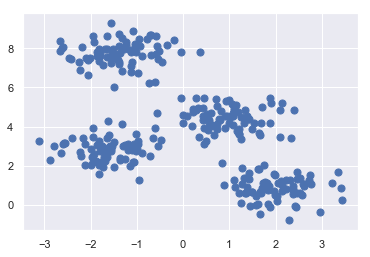

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

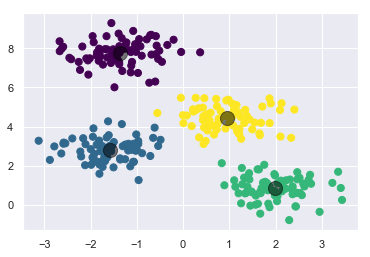

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## The rest is simply for fun, don't learn it seriously

K means for digit classification!

In [5]:
# This may take a while to run.... approximately 10 minutes or the first time to run

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', data_home='./datasets', version=1, return_X_y=True) # this will directly give you the data X and label y

In [9]:
PLAY_SIZE = 1000

indice = np.random.choice(np.arange(len(X)), size=PLAY_SIZE, replace=False) # Random select without replacement
X = X[indice]
y = y[indice]

print(X.shape, y.shape)

(1000, 784) (1000,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=511) #2/3 dataset is used for training


In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=10, random_state=1)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [13]:
kmeans_prediction = kmeans.predict(X_train)

In [15]:
original_to_kmeans = np.zeros([10,10]) # row is the kmeans class ind, column is the original y label ind
for predict_label in range(10):
    labels,count = np.unique(y_train[kmeans_prediction == predict_label],return_counts=True)    
    print(labels,'with', count)
    original_to_kmeans[predict_label, labels.astype(int)] = count
print()
print(original_to_kmeans)

['3' '5' '8'] with [27 22 37]
['0' '1' '2' '3' '5' '7' '8'] with [ 1 32 18  1  2  1  5]
['1' '2' '3' '4' '5' '6' '7' '8' '9'] with [29  5  9  6  9  9  6  5  2]
['0' '2' '3' '5' '8'] with [ 1 10 43 12 14]
['1' '2' '4' '5' '7' '8' '9'] with [ 1  1 14  5 46  4 15]
['2' '3' '4' '5' '7' '8' '9'] with [ 1  5 30  7 17  1 44]
['0' '2' '4' '8'] with [ 1 31  1  2]
['0' '2' '5' '6' '9'] with [ 2  1  1 29  2]
['0' '3' '5' '6'] with [14  3  5 25]
['0' '3'] with [55  1]

[[ 0.  0.  0. 27.  0. 22.  0.  0. 37.  0.]
 [ 1. 32. 18.  1.  0.  2.  0.  1.  5.  0.]
 [ 0. 29.  5.  9.  6.  9.  9.  6.  5.  2.]
 [ 1.  0. 10. 43.  0. 12.  0.  0. 14.  0.]
 [ 0.  1.  1.  0. 14.  5.  0. 46.  4. 15.]
 [ 0.  0.  1.  5. 30.  7.  0. 17.  1. 44.]
 [ 1.  0. 31.  0.  1.  0.  0.  0.  2.  0.]
 [ 2.  0.  1.  0.  0.  1. 29.  0.  0.  2.]
 [14.  0.  0.  3.  0.  5. 25.  0.  0.  0.]
 [55.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


In [16]:
original_to_kmeans.argmax(axis=0)

array([9, 1, 6, 3, 5, 0, 7, 4, 0, 5])

In [17]:
original_to_kmeans.argmax(axis=1)

array([8, 1, 1, 3, 7, 9, 2, 6, 6, 0])

In [18]:
mapper = original_to_kmeans.argmax(axis=0)
mapper2 = original_to_kmeans.argmax(axis=1)

### Let's have a look on the prediction accuracy

In [19]:
# y_test_map_to_kmeans = [mapper[int(i)] for i in y_test]

In [20]:
accuracy = np.mean(mapper2[kmeans.predict(X_test)]==y_test.astype(int))
accuracy

0.5212121212121212

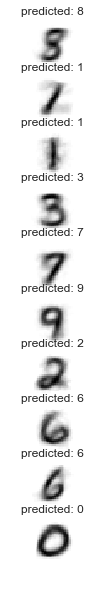

In [21]:
fig, axs = plt.subplots(10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(kmeans.cluster_centers_[i,:].reshape(28,28), cmap='binary')
    axs[i].set_title("predicted: " + str(mapper2[i]))
    axs[i].axis('off')